In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import geone.geosclassicinterface as gci
import pyvista as pv
import sys
import scipy

import os

import shapely
from shapely.geometry import Polygon, LineString, MultiPolygon, MultiLineString
import rasterio
import rasterio.features
from rasterio import Affine

sys.path.append("../")
import EROS
from EROS import plot_bh

%load_ext autoreload
%autoreload 2

In [2]:
ox = 0
nx = 300
sx = 0.2
xg = np.arange(ox, ox+sx*(nx+1), sx)
xgc = np.linspace(ox+sx/2, ox+sx*nx-sx/2, nx)
plot_xg = np.linspace(ox, ox+nx*sx, nx)
nz = 200
sz = 1/6
oz = 0
z1 = oz+nz*sz
x1 = ox + nx*sx

# parameters
var = 5
r = 45

cm = gcm.CovModel1D(elem=[("cubic", {"w":var, "r":r})])

In [7]:
N = 100
means = np.sort(np.random.uniform(-5, z1+5, N))
real_surf, arr_res, list_p_cond = EROS.sim_uncond_2D(N, cm, means,
                                      (nx, nz), (sx, sz), (ox, oz), alpha=1, xi=0.1, seed=1)

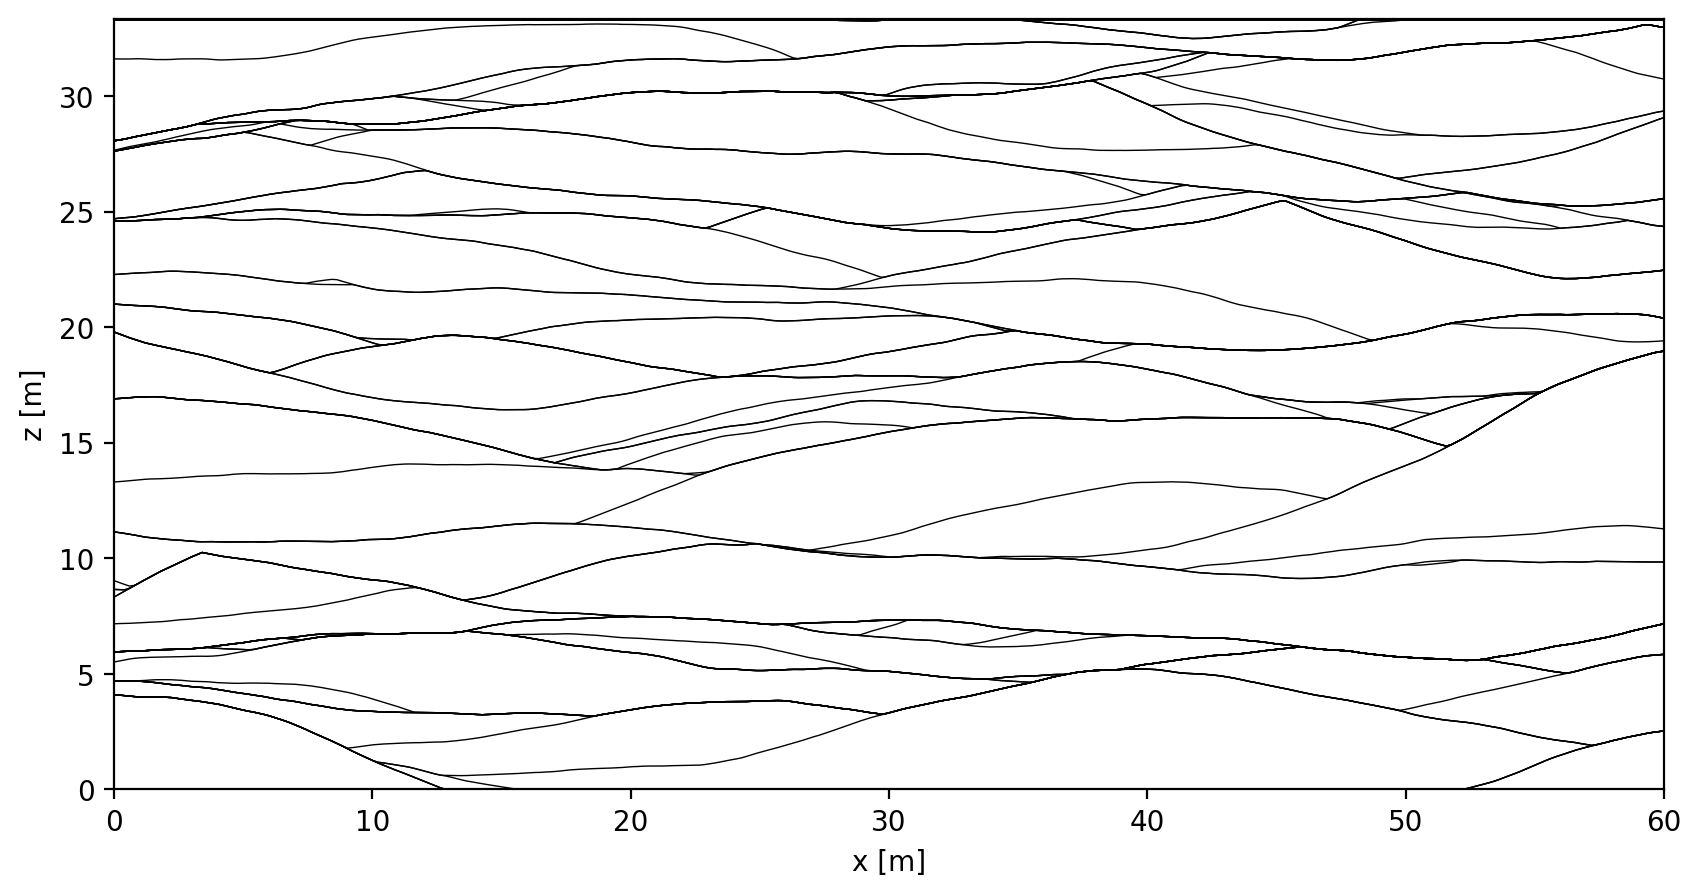

In [8]:
fig, axs = plt.subplots(figsize=(10,5), dpi=200)
plt.plot(plot_xg, real_surf.T, c="k", linewidth=.5)
plt.ylim(0, z1)
plt.xlim(0, x1)
plt.xlabel("x [m]")
plt.ylabel("z [m]")
plt.show()

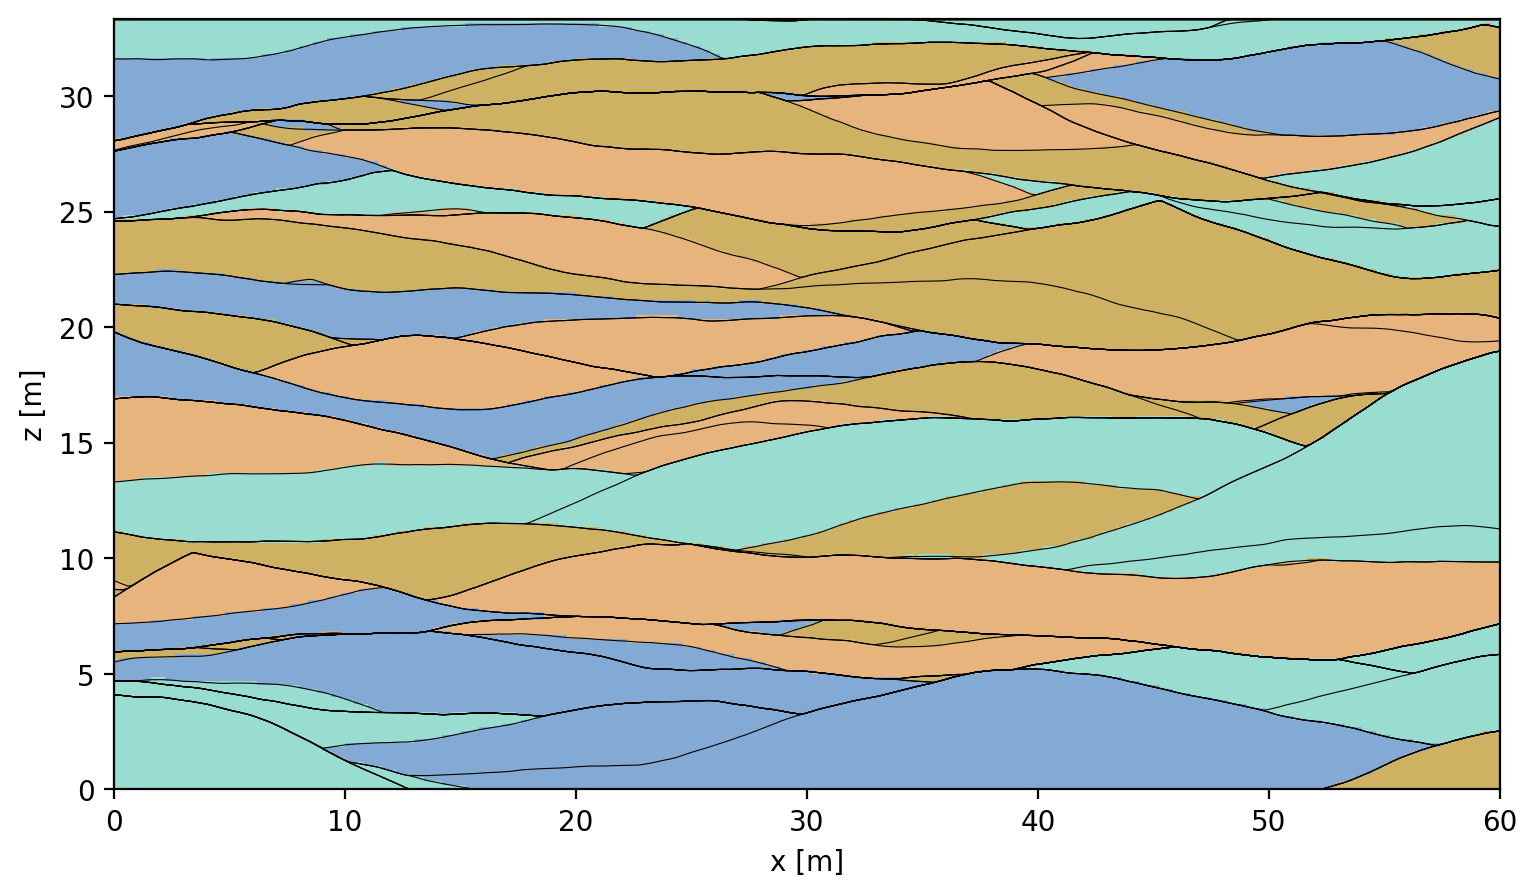

In [9]:
arr_plot = np.zeros([nz, nx, 3])
for ival in np.unique(arr_res):
    np.random.seed(ival+24)
    arr_plot[arr_res==ival] = np.random.random(size=3)
    
fig, axs = plt.subplots(figsize=(10,5), dpi=200)
plt.imshow(arr_plot, extent=[ox, x1, oz, z1], origin="lower", interpolation="none", alpha=.7)
plt.plot(plot_xg, real_surf.T, c="k", linewidth=.4)
plt.xlabel("x [m]")
plt.ylabel("z [m]")
plt.show()

(array([15697.,     0.,     0., 15102.,     0.,     0., 15059.,     0.,
            0., 14142.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

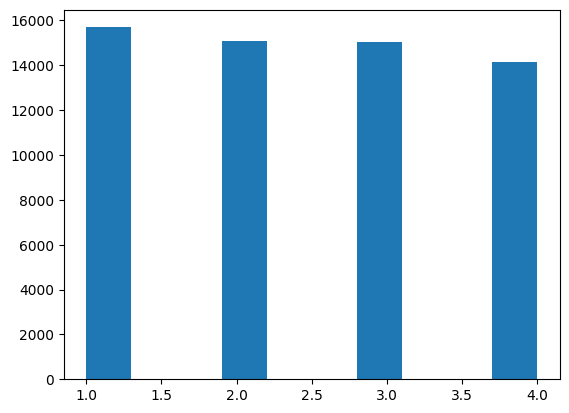

In [10]:
plt.hist(arr_res.flatten())